# ANALISE DE PREÇOS DE CASAS

In [53]:
# IMPORTAÇÃO DAS BIBLIOTECAS
import plotly.express as px 
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [54]:
#CARREGADMENTO DE DATASET E ATRIBUIÇÃO A UMA VARIAVEL
Preco_de_casas = pd.read_csv('../Dados/Bases_de_dados/house_prices.csv')
Preco_de_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [55]:
Preco_de_casas.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
# PARA VERIFICAR SE Existem valores faltantes 
Preco_de_casas.isnull

<bound method DataFrame.isnull of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7 

In [57]:
Preco_de_casas.corr() # tabela de correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


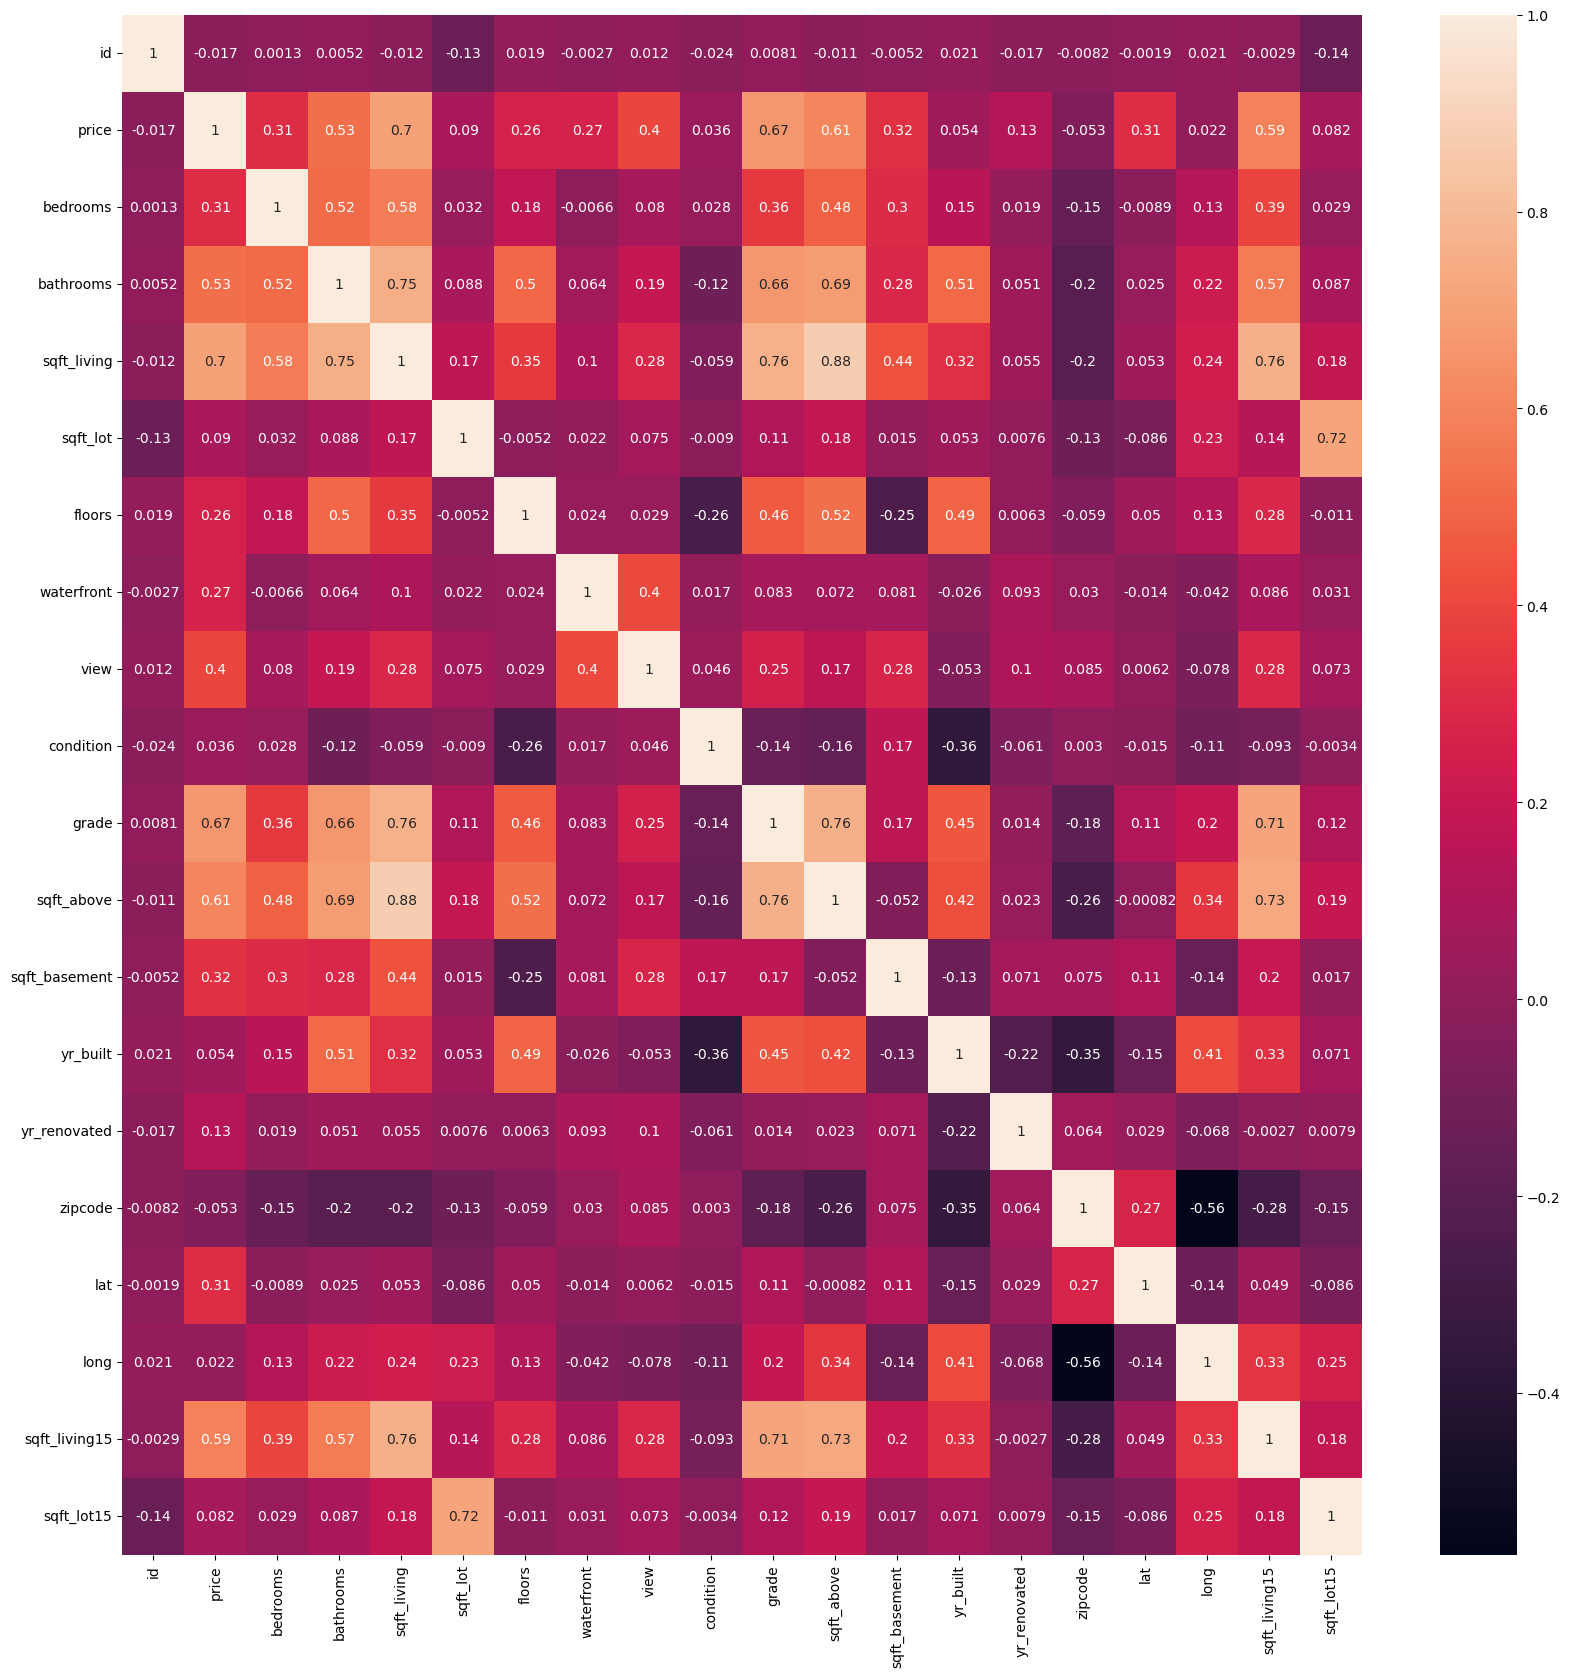

In [58]:
# visualiza de mapa de correlacoes
figura = plt.figure(figsize=(20, 20))
sns.heatmap(Preco_de_casas.corr(),color='blue', annot=True); #e as respetivas anotacoes

In [59]:
X_casas = Preco_de_casas.iloc[:,5:6].values # para trabalhar com a coluna 5 a metragem das casas
X_casas


array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [60]:
y_casas = Preco_de_casas.iloc[:,2].values # a coluna dos precos das casas
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

# DIVISÃO DE DADOS DE TREINAMENTO E DE TESTE E TREINAMENTO

In [61]:
# dIVISAO DOS DADOS DE TREINAMENTO E TESTE
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state=0)

In [62]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [63]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

In [64]:
from sklearn.linear_model import LinearRegression
Regression_casas = LinearRegression()
Regression_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [65]:
# teste com b0 - constante
Regression_casas.intercept_

-37893.59850106668

In [66]:
# teste com b1 - coeficiente
Regression_casas.coef_

array([278.32860644])

In [67]:
# avaliacao do desempenho com dados de treinamento
Regression_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789787

In [68]:
# Avaliacao de desempenho com dados de teste
Regression_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453016

In [69]:
# previsoes
Previsoes = Regression_casas.predict(X_casas_treinamento)
Previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [70]:
# Grafico de previsoes
grafico = px.scatter(x=X_casas_treinamento.ravel(), y= Previsoes)
grafico.show()

In [71]:
grafico1 = px.scatter(x=X_casas_treinamento.ravel(), y= y_casas_treinamento)
grafico2 = px.line(x=X_casas_treinamento.ravel(), y = Previsoes)
grafico2.data[0].line.color='green'
grafico3 = go.Figure(data=grafico1.data +grafico2.data) #para concatenar os dados dos graficos
grafico3

# METRICAS DE AVALIACAO DE ERROS REGRESSAO LINEAR

In [72]:
# PRIMEIRA METRICA COM DADOS DE TESTE
previsor_casas = Regression_casas.predict(X_casas_teste) # nota-se que os valores sao superiores aos reais
previsor_casas

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [73]:
# valores reais
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [74]:
# Analisando a diferenca entre os valores
y_casas_teste - previsor_casas

array([ -63116.30871034,  316099.00641905,  199200.40522524, ...,
       -180512.90534826, -106032.73903242, -123500.16200177])

In [75]:
# Valores absolutos sem considerar os sinais negativos
abs(y_casas_teste - previsor_casas)

array([ 63116.30871034, 316099.00641905, 199200.40522524, ...,
       180512.90534826, 106032.73903242, 123500.16200177])

In [76]:
# CALCULO DE MEAN ABSOLUTE ERROR
abs(y_casas_teste - previsor_casas).mean() #erro absoluto

172604.1288999541

In [77]:
# ERRO ABSOLUTO COMO VISTO ACIMA (recomendado para minimizar o erro)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_casas_teste, previsor_casas)

172604.1288999541

In [78]:
# PENALIZACAO DO ERRO ABSOLUTO
mean_squared_error(y_casas_teste, previsor_casas) # Matematicamente, elevamos ao quadrado o erro absoluto

70170013932.11592

In [79]:
# REDUCAO DO ERRO
np.sqrt(mean_squared_error(y_casas_teste, previsor_casas)) # Matematicamente calculamos a raizQ do erro penalizado para reduzi-lo

264896.23238565685

In [80]:
    # Grafico com base de dados de teste
grafico1 = px.scatter(x=X_casas_teste.ravel(), y= y_casas_teste)
grafico2 = px.line(x=X_casas_teste.ravel(), y = previsor_casas)
grafico2.data[0].line.color='gray'
grafico3 = go.Figure(data=grafico1.data +grafico2.data) #para concatenar os dados dos graficos
grafico3

# REGRESSAO LINEAR MULTIPLA

In [81]:
Preco_de_casas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [82]:
# Vamos trabalhar com mais atributos com relacao ao simples
X_casas = Preco_de_casas.iloc[:, 3:19].values # PREVISORES
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [83]:
y_casas = Preco_de_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [84]:
#DIVISAO DOS DADOS DE TREINAMENTO E TESTE
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [85]:
X_casas_treinamento.shape, X_casas_teste.shape

((15129, 16), (6484, 16))

In [86]:
# treinamento
Regressor_multiplo_casas = LinearRegression()
Regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [87]:
# verificar b0 constante
Regressor_multiplo_casas.intercept_

5736222.703414404

In [88]:
Regressor_multiplo_casas.coef_ #coeficientes

array([-3.08423090e+04,  3.66540816e+04,  1.12179159e+02,  8.00604121e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565320e+01,  4.25226266e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [89]:
# Avaliacao do desempenho com dados de treinamento
Regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.7029888085955016

In [90]:
# Avaliacao do desempenho com dados de teste
Regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.6885414149062143

In [91]:
previsor_casas = Regressor_multiplo_casas.predict(X_casas_teste) # RESULTADO PREVISTO
previsor_casas 

array([ 383751.77768686, 1514216.17517457,  546921.96179101, ...,
        314968.5762328 ,  219405.55573558,  148128.83467045])

In [92]:
y_casas_teste # Dados reais

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [93]:
#CALCULO DE ERRO ABSOLUTO
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsor_casas) # recomendado

123888.4437748424

In [94]:
mean_squared_error(y_casas_teste, previsor_casas) # com penalizacao do erro

42760757001.5434

In [95]:
np.sqrt(mean_absolute_error(y_casas_teste, previsor_casas)) # com reducao de penalizacao do erro

351.977902395651